# Homework 5 session 8,9

## Task 1. Visualization of Hand-Written Digits

As one of the examples sklearn provides a dataset of handwritten digits. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from scipy.stats import t
from sklearn import preprocessing

In [85]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

In [4]:
#split data into training, validation and test samples
X1=X[:1000,:]; y1=y[:1000]
X2=X[1000:-300,:]; y2=y[1000:-300]
X3=X[-300:,:]; y3=y[-300:]

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


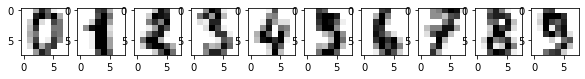

In [5]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

Now apply PCA to see if we can describe the data with a smaller number of most significant features

### Q1. Use PCA to transform the first 1000 digit images (X1). How many leading principal components are needed to cover a)50%, b)80% of the information from the original dataset?
Make sure to standardize the data beofe applying PCA

In [104]:
scalerX = preprocessing.StandardScaler().fit(X1)
X1S=scalerX.transform(X1) 
X2S=scalerX.transform(X2) 
X3S=scalerX.transform(X3) 

In [105]:
from sklearn.decomposition import PCA

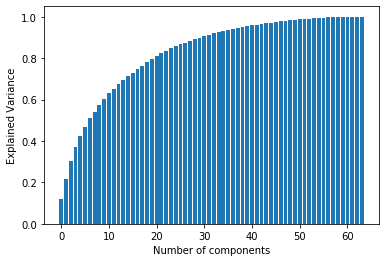

In [106]:
#perform PC decomposition over X1
pca = PCA(X1S.shape[1])
X1P=pca.fit_transform(X1S)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of components
n=X1S.shape[1]
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

About 6-7 components explain 50% of the data, and about 18-19 explain 80% of the data

### Q2. Visualize digits 3, 6, 7 (y=3,6,7) using the first two principal components of X1  

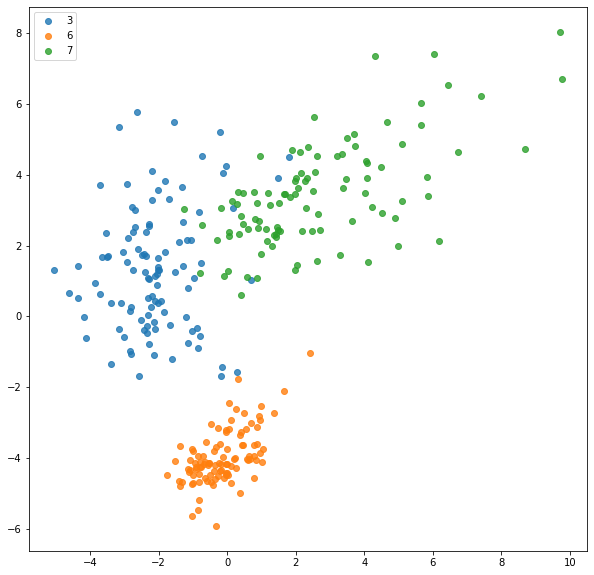

In [107]:
#2-d plot
colors=('red','green','blue') 
fig = plt.figure(figsize=(10,10))
for d in [3,6,7]: #list of digits to target
    plt.plot(np.array(X1P[y1==d,0]), np.array(X1P[y1==d,1]), #plot when we are at the target digit
        'o', alpha=0.8, label=d)
plt.legend(['3','6','7'],loc='upper left')

## Task 2. Classify the digits using leading principal components

### Q1. Train multi-class logistic regression over the first 1000 digits using first 5 leading principal components
Report in-sample and out-of-sample (over X3, the last 300 digits) accuracy. 

You will need to apply the same scaler and PCA transform trained above to X3

Here and further use regularization constant C=10000 in logistic regression to avoid regularization

In [117]:
pca1 = PCA(5)
X1_pca=pca1.fit_transform(X1S)
X3_pca=pca1.transform(X3S)

In [109]:
from sklearn.linear_model import LogisticRegression

In [120]:
lm1 = LogisticRegression(random_state=0, C = 10000).fit(X1_pca, y1)
scoreIn = lm1.score(X1_pca, y1)
print("In sample score: {}".format(scoreIn))
scoreOut = lm1.score(X3_pca, y3)
print("Out of sample score: {}".format(scoreOut))

In sample score: 0.836
Out of sample score: 0.7133333333333334


### Q2. Select the optimal number of principal components for the classification above in terms of the out-of-sample accuracy measured over the validation sample X2. Report the performance of the classification after this feature selection over the test sample X3 of the last 300 digits.

In [151]:
#np.random.seed(2019)
Score_IS=[]; Score_OS=[] #lists for recording in-sample (training) and out-of-sample (test) score
for i in range(1, 65):
    pca2 = PCA(i)
    X1_pca2 = pca2.fit_transform(X1S)
    X2_pca2 = pca2.transform(X2S)
    X3_pca2 = pca2.transform(X3S)
    lm2 = LogisticRegression(random_state=0, C = 10000).fit(X1_pca2, y1)
    Score_IS.append(lm2.score(X1_pca2, y1))
    Score_OS.append(lm2.score(X2_pca2, y2))
print("IS Score is {}".format(np.max(Score_IS)) + " which has this many principal components: {}".format(np.argmax(Score_IS)))
print("OS Score is {}".format(np.max(Score_OS)) + " which has this many principal components: {}".format(np.argmax(Score_OS)))

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

IS Score is 1.0 which has this many principal components: 40
OS Score is 0.93158953722334 which has this many principal components: 51


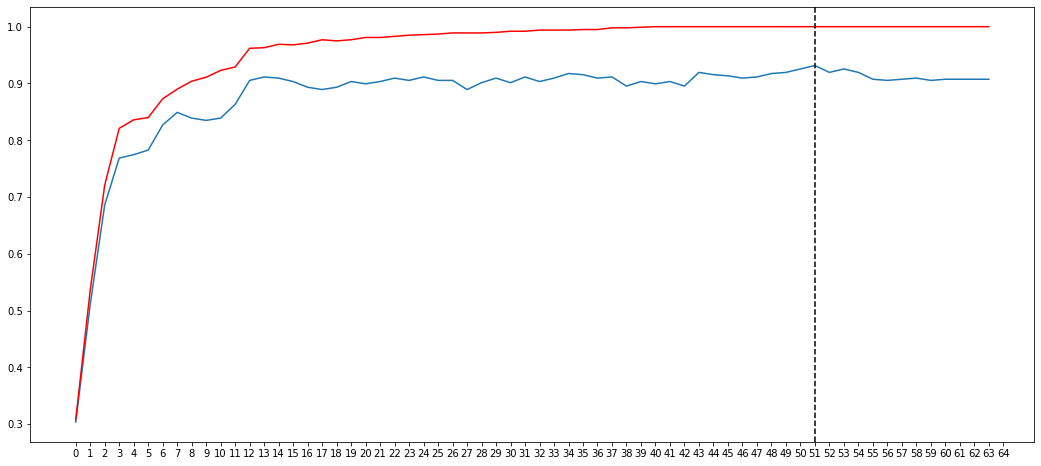

In [162]:
plt.figure(figsize = (18,8))
plt.plot(Score_OS)
plt.plot(Score_IS, color = 'red')
plt.axvline(x = np.argmax(Score_OS), color = 'black', linestyle = 'dashed')
plt.xticks(np.arange(0, 65))
plt.show()

16 Principal components produces a local max before leveling off, 51 components for the max value

In [163]:
pca1 = PCA(51)
X1_pca2=pca1.fit_transform(X1S)
X3_pca2=pca1.transform(X3S)

In [164]:
lm3 = LogisticRegression(random_state=0, C = 10000).fit(X1_pca2, y1)
scoreIn = lm3.score(X1_pca2, y1)
print("In sample score: {}".format(scoreIn))
scoreOut = lm3.score(X3_pca2, y3)
print("Out of sample score: {}".format(scoreOut))

In sample score: 1.0
Out of sample score: 0.8533333333333334


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Task3. Time Series Analysis
**Dataset Description**
- Portland Oregon riders monthly data: It is a monthly count of riders for the Portland public transportation system. The website states that it is from January 1960 through June 1969

**Tasks**:
- Detect a trend
- Decompose into trend + seasonality + residuals
- Analyze residual distribution
- Select the top 3-5 outliers based on absolute values of residuals 

In [21]:
# import dataset
df = pd.read_csv("portland-oregon-average-monthly-.csv")

In [22]:
# change column name to make it easier for your life
df.columns = ["month", "avgMonthlyRide"]

In [23]:
# remove artifact data
df = df.drop(df.index[df['avgMonthlyRide'] == ' n=114'])

In [24]:
# type transfer: int32 for `avgMonthlyRide`, datetime for `month`
df['avgMonthlyRide'] = df['avgMonthlyRide'].astype(np.int32)
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')
df.head()

,month,avgMonthlyRide
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [36]:
df.min()

month             1960-01-01 00:00:00
avgMonthlyRide                    613
dtype: object

In [25]:
# get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 2 columns):
month             114 non-null datetime64[ns]
avgMonthlyRide    114 non-null int32
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.2 KB


In [26]:
# get the describe of the dataset
df.describe()

,avgMonthlyRide
count,114.000000
mean,1120.543860
std,270.888317
min,613.000000
25%,885.000000
50%,1158.000000
75%,1340.000000
max,1558.000000


### Q1. Visualize the time-series of monthly ridership

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy

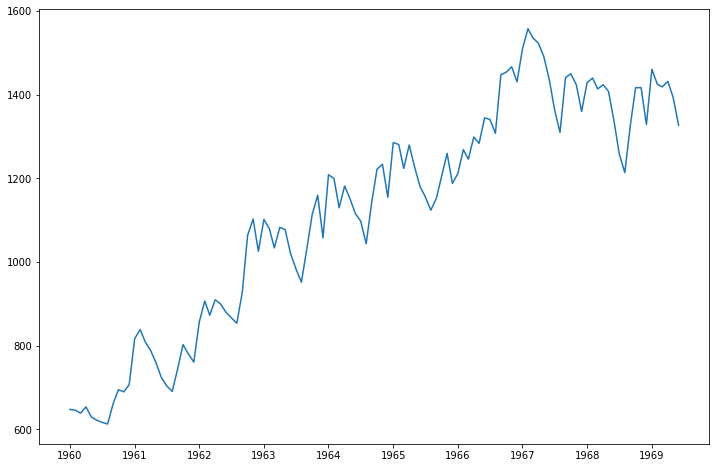

In [42]:
plt.figure(figsize = (12,8))
plt.plot(df.month.astype('O'), df.avgMonthlyRide)

In [47]:
df.month.astype('O')

0      1960-01-01 00:00:00
1      1960-02-01 00:00:00
2      1960-03-01 00:00:00
3      1960-04-01 00:00:00
4      1960-05-01 00:00:00
5      1960-06-01 00:00:00
6      1960-07-01 00:00:00
7      1960-08-01 00:00:00
8      1960-09-01 00:00:00
9      1960-10-01 00:00:00
10     1960-11-01 00:00:00
11     1960-12-01 00:00:00
12     1961-01-01 00:00:00
13     1961-02-01 00:00:00
14     1961-03-01 00:00:00
15     1961-04-01 00:00:00
16     1961-05-01 00:00:00
17     1961-06-01 00:00:00
18     1961-07-01 00:00:00
19     1961-08-01 00:00:00
20     1961-09-01 00:00:00
21     1961-10-01 00:00:00
22     1961-11-01 00:00:00
23     1961-12-01 00:00:00
24     1962-01-01 00:00:00
25     1962-02-01 00:00:00
26     1962-03-01 00:00:00
27     1962-04-01 00:00:00
28     1962-05-01 00:00:00
29     1962-06-01 00:00:00
              ...         
84     1967-01-01 00:00:00
85     1967-02-01 00:00:00
86     1967-03-01 00:00:00
87     1967-04-01 00:00:00
88     1967-05-01 00:00:00
89     1967-06-01 00:00:00
9

In [49]:
df.dtypes

month             datetime64[ns]
avgMonthlyRide             int32
dtype: object

### Q2. Visualize the 12-month moving average to assess the trend

In [51]:
df1=pd.DataFrame(df)
df1.head()

,month,avgMonthlyRide
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [69]:
df1.columns

Index(['month', 'avgMonthlyRide'], dtype='object')

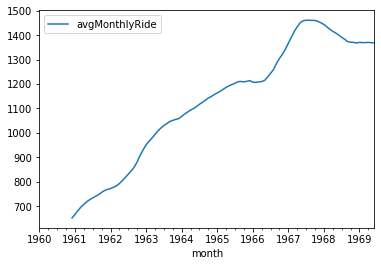

In [53]:
#7 year moving average (avg over the last 7 years) - find where line is most smooth
df1.set_index('month').rolling(window = 12).mean().plot()

### Q3. Perform seasonal decomposition using 12 month period

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
plt.rcParams['figure.figsize'] = [8, 8]

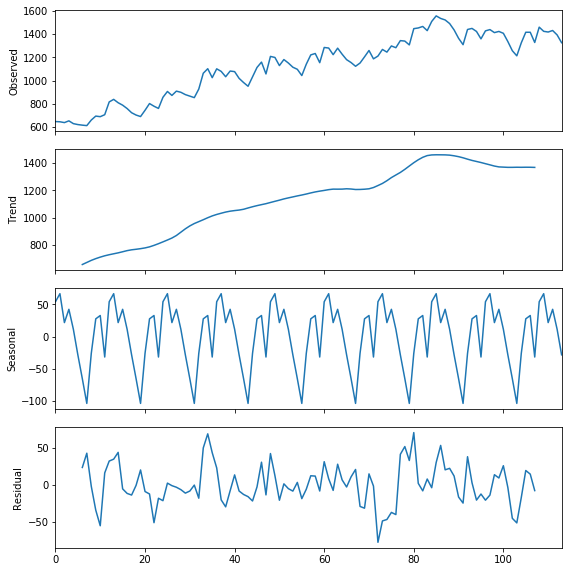

In [70]:
res = seasonal_decompose(df1.avgMonthlyRide,model='additive',freq=12) #try mult
res.plot()
plt.show()

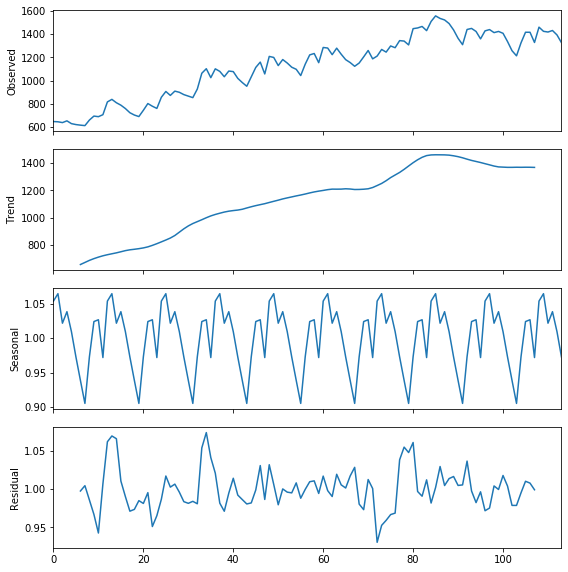

In [71]:
res = seasonal_decompose(df1.avgMonthlyRide,model='multiplicitive',freq=12) #try mult
res.plot()
plt.show()

### Q4. Visualize the distribution of residues and visually compare it with normal distribution with the same mean and standard deviation

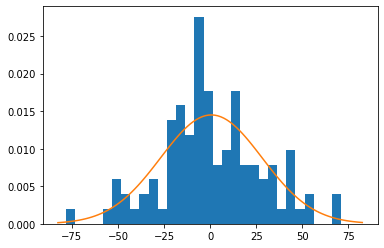

In [122]:
# check the distribution of a sample of data is the histogram
from numpy.random import seed
from numpy.random import randn
# seed the random number generator
seed(1)
# generate univariate observations
# histogram plot
addResult = seasonal_decompose(df1.avgMonthlyRide, model='additive', freq = 12)
residual = np.array(addResult.resid)
residual = residual[np.logical_not(np.isnan(residual))]
# get rid of nan values from the seasonal_decompose
plt.hist(residual,bins=30,density=True)
sigma=residual.std()
x=np.linspace(-3*sigma,3*sigma,100)
plt.plot(x,scipy.stats.norm.pdf(x,loc=residual.mean(),scale=sigma))
plt.show()

### Q5. Find the strongest lower/upper outliers (months with the smallest and largest residues)

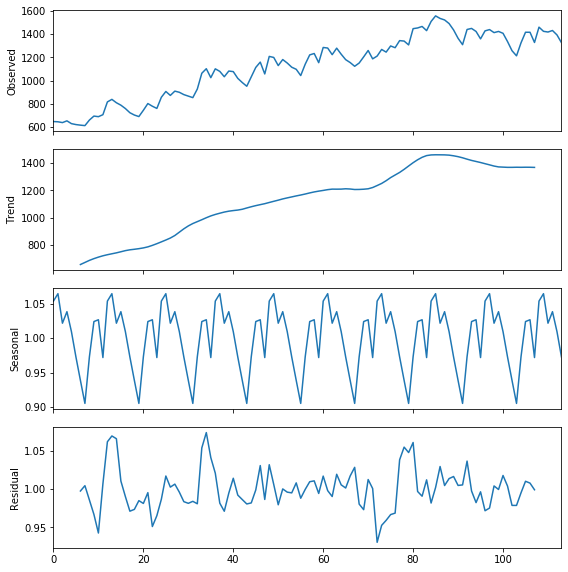

In [80]:
monthSeries = df1['avgMonthlyRide']
monthDecomp = seasonal_decompose(monthSeries, model='mult', freq = 12)
monthDecomp.plot();

In [81]:
df1.month[monthDecomp.resid>1.05]

12   1961-01-01
13   1961-02-01
14   1961-03-01
33   1962-10-01
34   1962-11-01
78   1966-07-01
80   1966-09-01
Name: month, dtype: datetime64[ns]

In [82]:
df1.month[monthDecomp.resid<0.95]

10   1960-11-01
72   1966-01-01
Name: month, dtype: datetime64[ns]

The months high outliers are Jan.-Mar. 1961, Oct./Nov. 1962, and July. + Sept. 1966, while the low outliers are Nov. 1960 and Jan. 1966